# Flight Price Prediction Project:

**STATEMENT: Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on**
- **1. Time of purchase patterns (making sure last-minute purchases are expensive)**
- **2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)**

**So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.**

Since Price is my target and it seems to be continuous feature so this perticular problem is **Regression Problem**.

In [1]:
# Importing necessary packages

# Importing fundamental packages
import warnings
warnings.filterwarnings("ignore")

import pyforest            

## For visualization
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.datasets import make_classification


## To create copy of data
import copy

## Pipeline Packages

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Ensemble Learning Algorithms Packages

from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

## Evaluation Metrics Packages
import statsmodels.api as sm
from scipy.stats import f
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse                         
from sklearn.metrics import classification_report

# Saving the model
import pickle

In [2]:
#importing dataset
df = pd.read_csv("Flight.csv") #Reading csv file
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Go First,20/10/2022,Get 100% Refund on Flight Cancellations,Goa,21:00,22:35,Non stop,"₹ 5,402"
2,1,IndiGo,20/10/2022,Ahmedabad,Goa,14:35,16:15,Non stop,"₹ 5,404"
3,2,SpiceJet,20/10/2022,Ahmedabad,Goa,07:50,09:30,Non stop,"₹ 4,526"
4,3,SpiceJet,20/10/2022,Ahmedabad,Goa,07:50,09:30,Non stop,"₹ 5,508"


In [3]:
# Unique value counts
for i in df:
    print("For ",i,":")
    print(df[i].value_counts())

For  Unnamed: 0 :
0     3
2     2
3     2
4     2
5     2
6     2
1     2
14    1
19    1
18    1
17    1
16    1
15    1
10    1
13    1
12    1
11    1
9     1
8     1
7     1
20    1
Name: Unnamed: 0, dtype: int64
For  Airline :
IndiGo       16
SpiceJet      6
Go First      4
Air India     1
Vistara       1
Name: Airline, dtype: int64
For  Journey_date :
21/10/2022    21
20/10/2022     7
Name: Journey_date, dtype: int64
For  From :
Ahmedabad                                  24
Get 100% Refund on Flight Cancellations     2
HDFCEMI                                     2
Name: From, dtype: int64
For  To :
Goa          26
MMTBFLEMI     2
Name: To, dtype: int64
For  Dtime :
07:50    3
21:00    2
21:05    2
06:45    2
16:30    2
14:35    2
13:10    2
18:40    2
01:15    1
17:25    1
18:30    1
13:40    1
18:10    1
21:10    1
01:40    1
02:25    1
14:40    1
23:05    1
14:25    1
Name: Dtime, dtype: int64
For  Atime :
09:30    3
22:35    2
16:15    2
22:55    2
13:55    2
20:20    2
22:20 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    29 non-null     int64 
 1   Airline       28 non-null     object
 2   Journey_date  28 non-null     object
 3   From          28 non-null     object
 4   To            28 non-null     object
 5   Dtime         28 non-null     object
 6   Atime         24 non-null     object
 7   Stops         28 non-null     object
 8   Price         28 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.2+ KB


In [5]:
a= ['MMTYESEMI','MMTWEDDEBIT','MMTOLAMONEY','MMTSCB','MMTWEDCREDIT','MMTMBK','Lock This Price','MMTUBI']

In [6]:
b= ['MMTYESEMI','MMTWEDDEBIT','MMTOLAMONEY','MMTSCB','Get 100% Refund on Flight Cancellations','MMTWEDCREDIT','MMTMBK','Lock This Price','MMTUBI']

In [7]:
df=df.dropna()

In [8]:
df=df.drop(['Unnamed: 0'],axis=1)

In [9]:
#Removing First row as it have only NaN values
df=df.drop([df.index[0]])

In [10]:
df=df[df.To.isin(a) == False]

In [11]:
df=df[df.From.isin(b) == False]

In [12]:
#To print all rows
pd.set_option('display.max_rows',None)

<IPython.core.display.Javascript object>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 2 to 28
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       22 non-null     object
 1   Journey_date  22 non-null     object
 2   From          22 non-null     object
 3   To            22 non-null     object
 4   Dtime         22 non-null     object
 5   Atime         22 non-null     object
 6   Stops         22 non-null     object
 7   Price         22 non-null     object
dtypes: object(8)
memory usage: 1.5+ KB


In [14]:
# Unique value counts
for i in df:
    print("For ",i,":")
    print(df[i].value_counts())

For  Airline :
IndiGo       12
SpiceJet      5
Go First      3
Air India     1
Vistara       1
Name: Airline, dtype: int64
For  Journey_date :
21/10/2022    17
20/10/2022     5
Name: Journey_date, dtype: int64
For  From :
Ahmedabad    21
HDFCEMI       1
Name: From, dtype: int64
For  To :
Goa          21
MMTBFLEMI     1
Name: To, dtype: int64
For  Dtime :
14:35    2
06:45    2
07:50    2
13:10    2
21:05    2
21:00    1
14:40    1
16:30    1
02:25    1
01:40    1
01:15    1
18:40    1
18:10    1
13:40    1
18:30    1
17:25    1
14:25    1
Name: Dtime, dtype: int64
For  Atime :
16:15    2
09:30    2
22:55    2
13:55    2
20:20    2
22:20    2
22:35    1
19:40    1
07:10    1
18:25    1
06:05    1
06:50    1
22:45    1
22:25    1
18:05    1
19:55    1
Name: Atime, dtype: int64
For  Stops :
1 stop via Mumbai       8
Non stop                7
1 stop via Bengaluru    2
1 stop via Pune         2
1 stop via New Delhi    2
1 stop via Hyderabad    1
Name: Stops, dtype: int64
For  Price :
₹ 7,399

In [15]:
#Checking shape of my dataset
df.shape

(22, 8)

In [16]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')
df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
2,IndiGo,20/10/2022,Ahmedabad,Goa,14:35,16:15,Non stop,5404.0
3,SpiceJet,20/10/2022,Ahmedabad,Goa,07:50,09:30,Non stop,4526.0
4,SpiceJet,20/10/2022,Ahmedabad,Goa,07:50,09:30,Non stop,5508.0
5,SpiceJet,20/10/2022,Ahmedabad,Goa,21:05,22:55,Non stop,5508.0
7,IndiGo,20/10/2022,HDFCEMI,Goa,06:45,13:55,1 stop via Mumbai,7399.0


In [17]:
#Grouping Airlines column for multiple airlines
df["Airline"].replace(("Spicejet, IndiGo","Air India, IndiGo","Spicejet, AirAsia","IndiGo, Air India","IndiGo, Spicejet",
                       "AirAsia, IndiGo","IndiGo, Go First","IndiGo, TruJet","Vistara, IndiGo","Spicejet, Air India",
                       "Air India, Go First","Vistara, Spicejet","Spicejet, Go First","Go First, IndiGo","IndiGo, AirAsia",
                       "Air India, AirAsia","Vistara, Go First","TruJet, IndiGo","Spicejet, Vistara","IndiGo, Vistara",
                       "Air India, Spicejet","AirAsia, Go First","Vistara, AirAsia","Vistara, Air India","Go First, AirAsia",
                       "Spicejet, TruJet","Vistara, TruJet","AirAsia, TruJet","Go First, Air India","Go First, Spicejet",
                       "Air India, Vistara","SpiceJet, IndiGo","IndiGo, SpiceJet","IndiGo, Alliance Air","SpiceJet, Vistara",
                      "SpiceJet, AirAsia","SpiceJet, Air India","Akasa Air, IndiGo","Go First, Akasa Air","Akasa Air, Vistara",
                      "SpiceJet, Go First","Akasa Air, Go First","Akasa Air, Alliance Air","AirAsia, Akasa Air","Alliance Air, IndiGo",
                      "Air India, Akasa Air","Akasa Air, AirAsia","Go First, SpiceJet","Akasa Air, Air India","AirAsia, Air India",
                       "Air India, SpiceJet","SpiceJet, Alliance Air","Go First, Vistara","Vistara, Akasa Air"),"Multiple Airlines",inplace=True)

In [18]:
#Checking the value counts of Airline column
df.Airline.value_counts()

IndiGo       12
SpiceJet      5
Go First      3
Air India     1
Vistara       1
Name: Airline, dtype: int64

In [19]:
#Grouping Stops column 
df["Stops"].replace(("1 stop via Mumbai","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi",
                     "1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi",
                     "1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur",
                     "1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati",
                     "1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai",
                     "1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore",
                     "1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi",
                     "1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati",
                     "1 stop via Dehradun","1 stop via Visakhapatnam","1 stop via Kolhapur","1 stop via Darbhanga","1 stop via Coimbatore",
                    "1 stop via Raipur","1 stop via Shirdi","1 stop via Belgaum","1 stop via Hubli","1 stop via Kozhikode","1 stop via Jaisalmer"),"1 Stop",inplace=True)


#Grouping Stops column
df["Stops"].replace(("2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via Mumbai,Hyderabad",
                     "2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad",
                     "2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai", "2 stop via Varanasi,Bengaluru",
                     "2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad",
                     "2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh",
                     "2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar",
                     "2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore",
                     "2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune",
                     "2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad",
                     "2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa",
                     "2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad",
                     "2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati",
                     "2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar",
                     "2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad","2 stop via Indore,Hyderabad",
                     "2 stop via Indore,Hyderabad","2 stop via Pune,Bengaluru","2 stop via Indore,Mumbai",
                     "2 stop via Visakhapatnam,Mumbai","2 stop via Chandigarh,Jaipur","2 stop via Rajahmundry,Hyderabad",
                     "2 stop via New Delhi,Bengaluru","2 stop via New Delhi,Bengaluru","2 stop via Pune,New Delhi",
                     "2 stop via Mumbai,Bengaluru","2 stop via Bengaluru,Mumbai"),"2 Stops",inplace=True)

In [20]:
#Checking the value counts of Stops column
df.Stops.value_counts()

1 Stop      15
Non stop     7
Name: Stops, dtype: int64

In [21]:
#Let me assign values for Stops column
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2},inplace = True)

In [22]:
#Checking the value counts of Stops column again
df.Stops.value_counts()

1    15
0     7
Name: Stops, dtype: int64

Now Stops column is set for our analysis.

In [23]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


I don't find any nan values in the dataset.

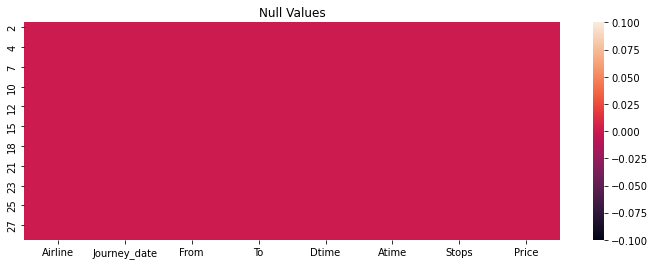

In [24]:
#Visualizeing null values
plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

By visualization we can clearly say that there is no null values in the dataset.

In [25]:
#Checking for empty observations
df.loc[df['Price'] == " "]

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price


There is no empty observations in my target column.

In [26]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

<IPython.core.display.Javascript object>

In [27]:
#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2022    22
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [29]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)

In [30]:
#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

10    22
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [31]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)

In [32]:
#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

21    17
20     5
Name: Journey_day, dtype: int64

Now Journey_day is ready for our analysis.

In [33]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

Dropping Journey_date column after extracting requered information.

In [34]:
#Converting object data type to datetime 
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
#Checking the data types of all columns again
df.dtypes

Airline                object
From                   object
To                     object
Dtime          datetime64[ns]
Atime          datetime64[ns]
Stops                   int64
Price                 float64
Journey_day             int64
dtype: object

The data type has changed now.

In [36]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
#Droping Dep_Time column after extraction
df = df.drop(["Dtime"],axis=1)

In [38]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [40]:
#Checking the data types of all columns again
df.dtypes

Airline         object
From            object
To              object
Stops            int64
Price          float64
Journey_day      int64
Dhour            int64
DMin             int64
AHour            int64
AMin             int64
dtype: object

These are the datatypes after extraction and preprocessing.

In [41]:
#Checking description of data set
df.describe()

,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.681818,9475.818182,20.772727,12.500000,27.727273,16.500000,31.136364
std,0.476731,4020.079088,0.428932,6.434653,15.790841,5.779685,17.452781
min,0.000000,4526.000000,20.000000,1.000000,0.000000,6.000000,5.000000
25%,0.000000,6052.000000,21.000000,7.000000,11.250000,13.000000,20.000000
50%,1.000000,8144.500000,21.000000,14.000000,30.000000,18.500000,27.500000
75%,1.000000,12386.250000,21.000000,17.750000,40.000000,22.000000,48.750000
max,1.000000,18004.000000,21.000000,21.000000,50.000000,22.000000,55.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

### Data Visualization

In [42]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To']


Above are the categorical columns in the dataset.

In [43]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Stops', 'Price', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


Above are the numerical columns in the dataset.

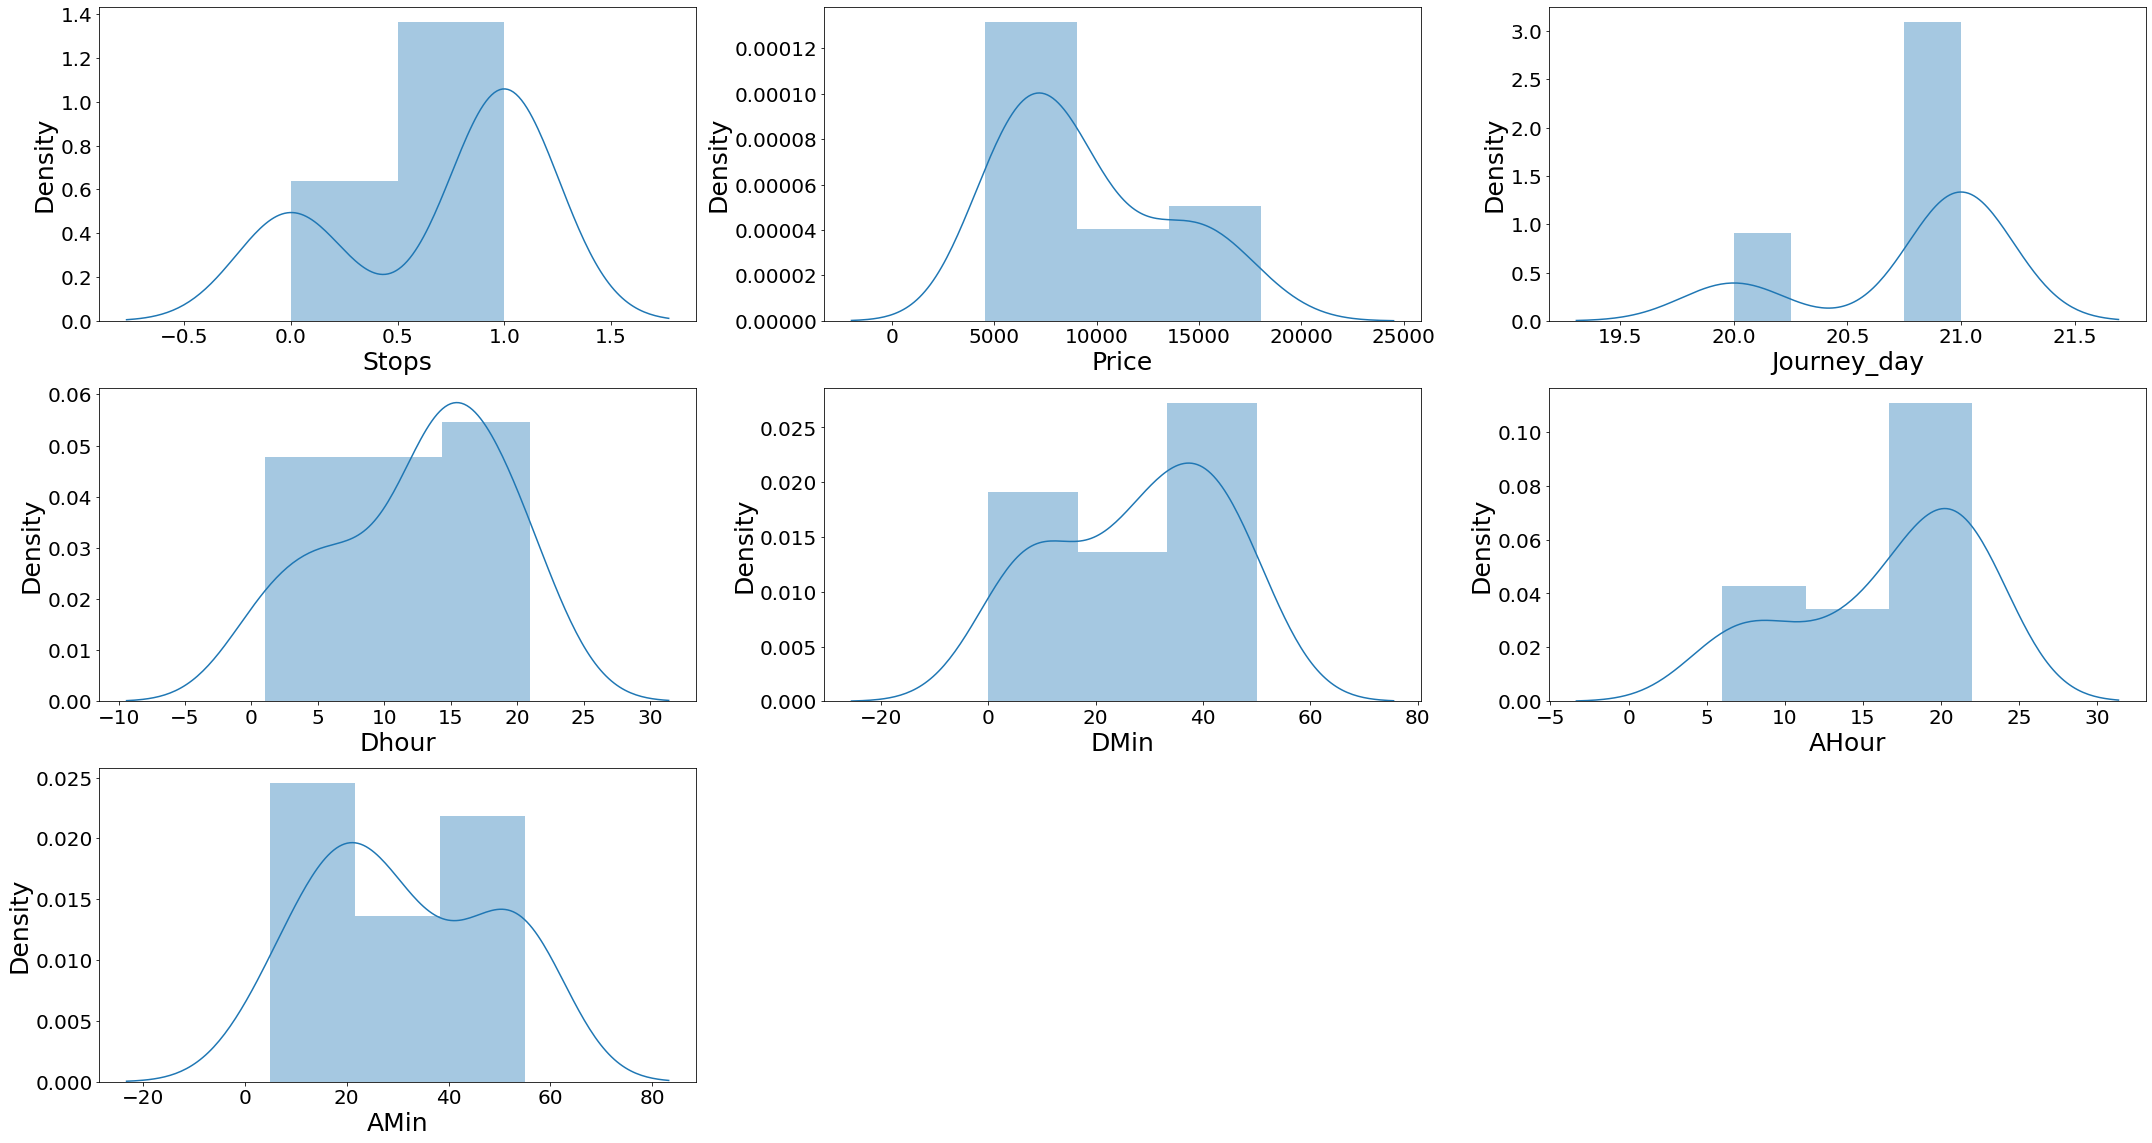

In [44]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in any of the numerical columns.

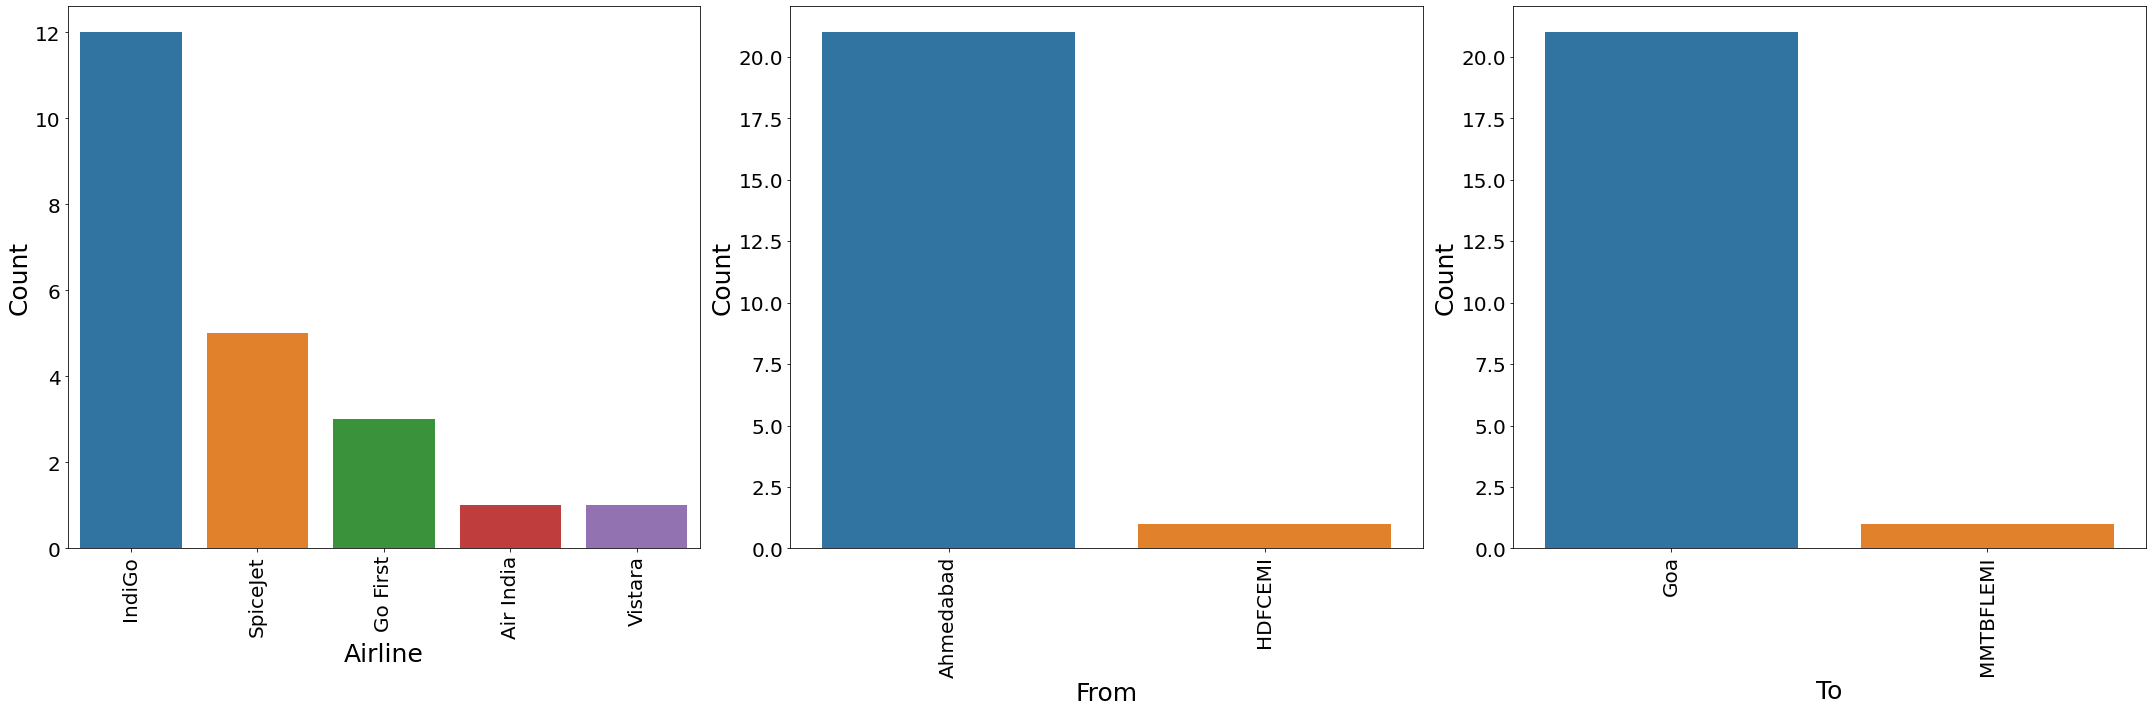

In [45]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Indigo has maximum count which means most of the passengers preferred Indigo for there travelling.
- New Delhi has maximum count for source which means maximum passengers are choosing New Delhi as there source.
- New Delhi has maximum count for Destination which means maximum passengers are choosing New Delhi as there Destination.

In [46]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

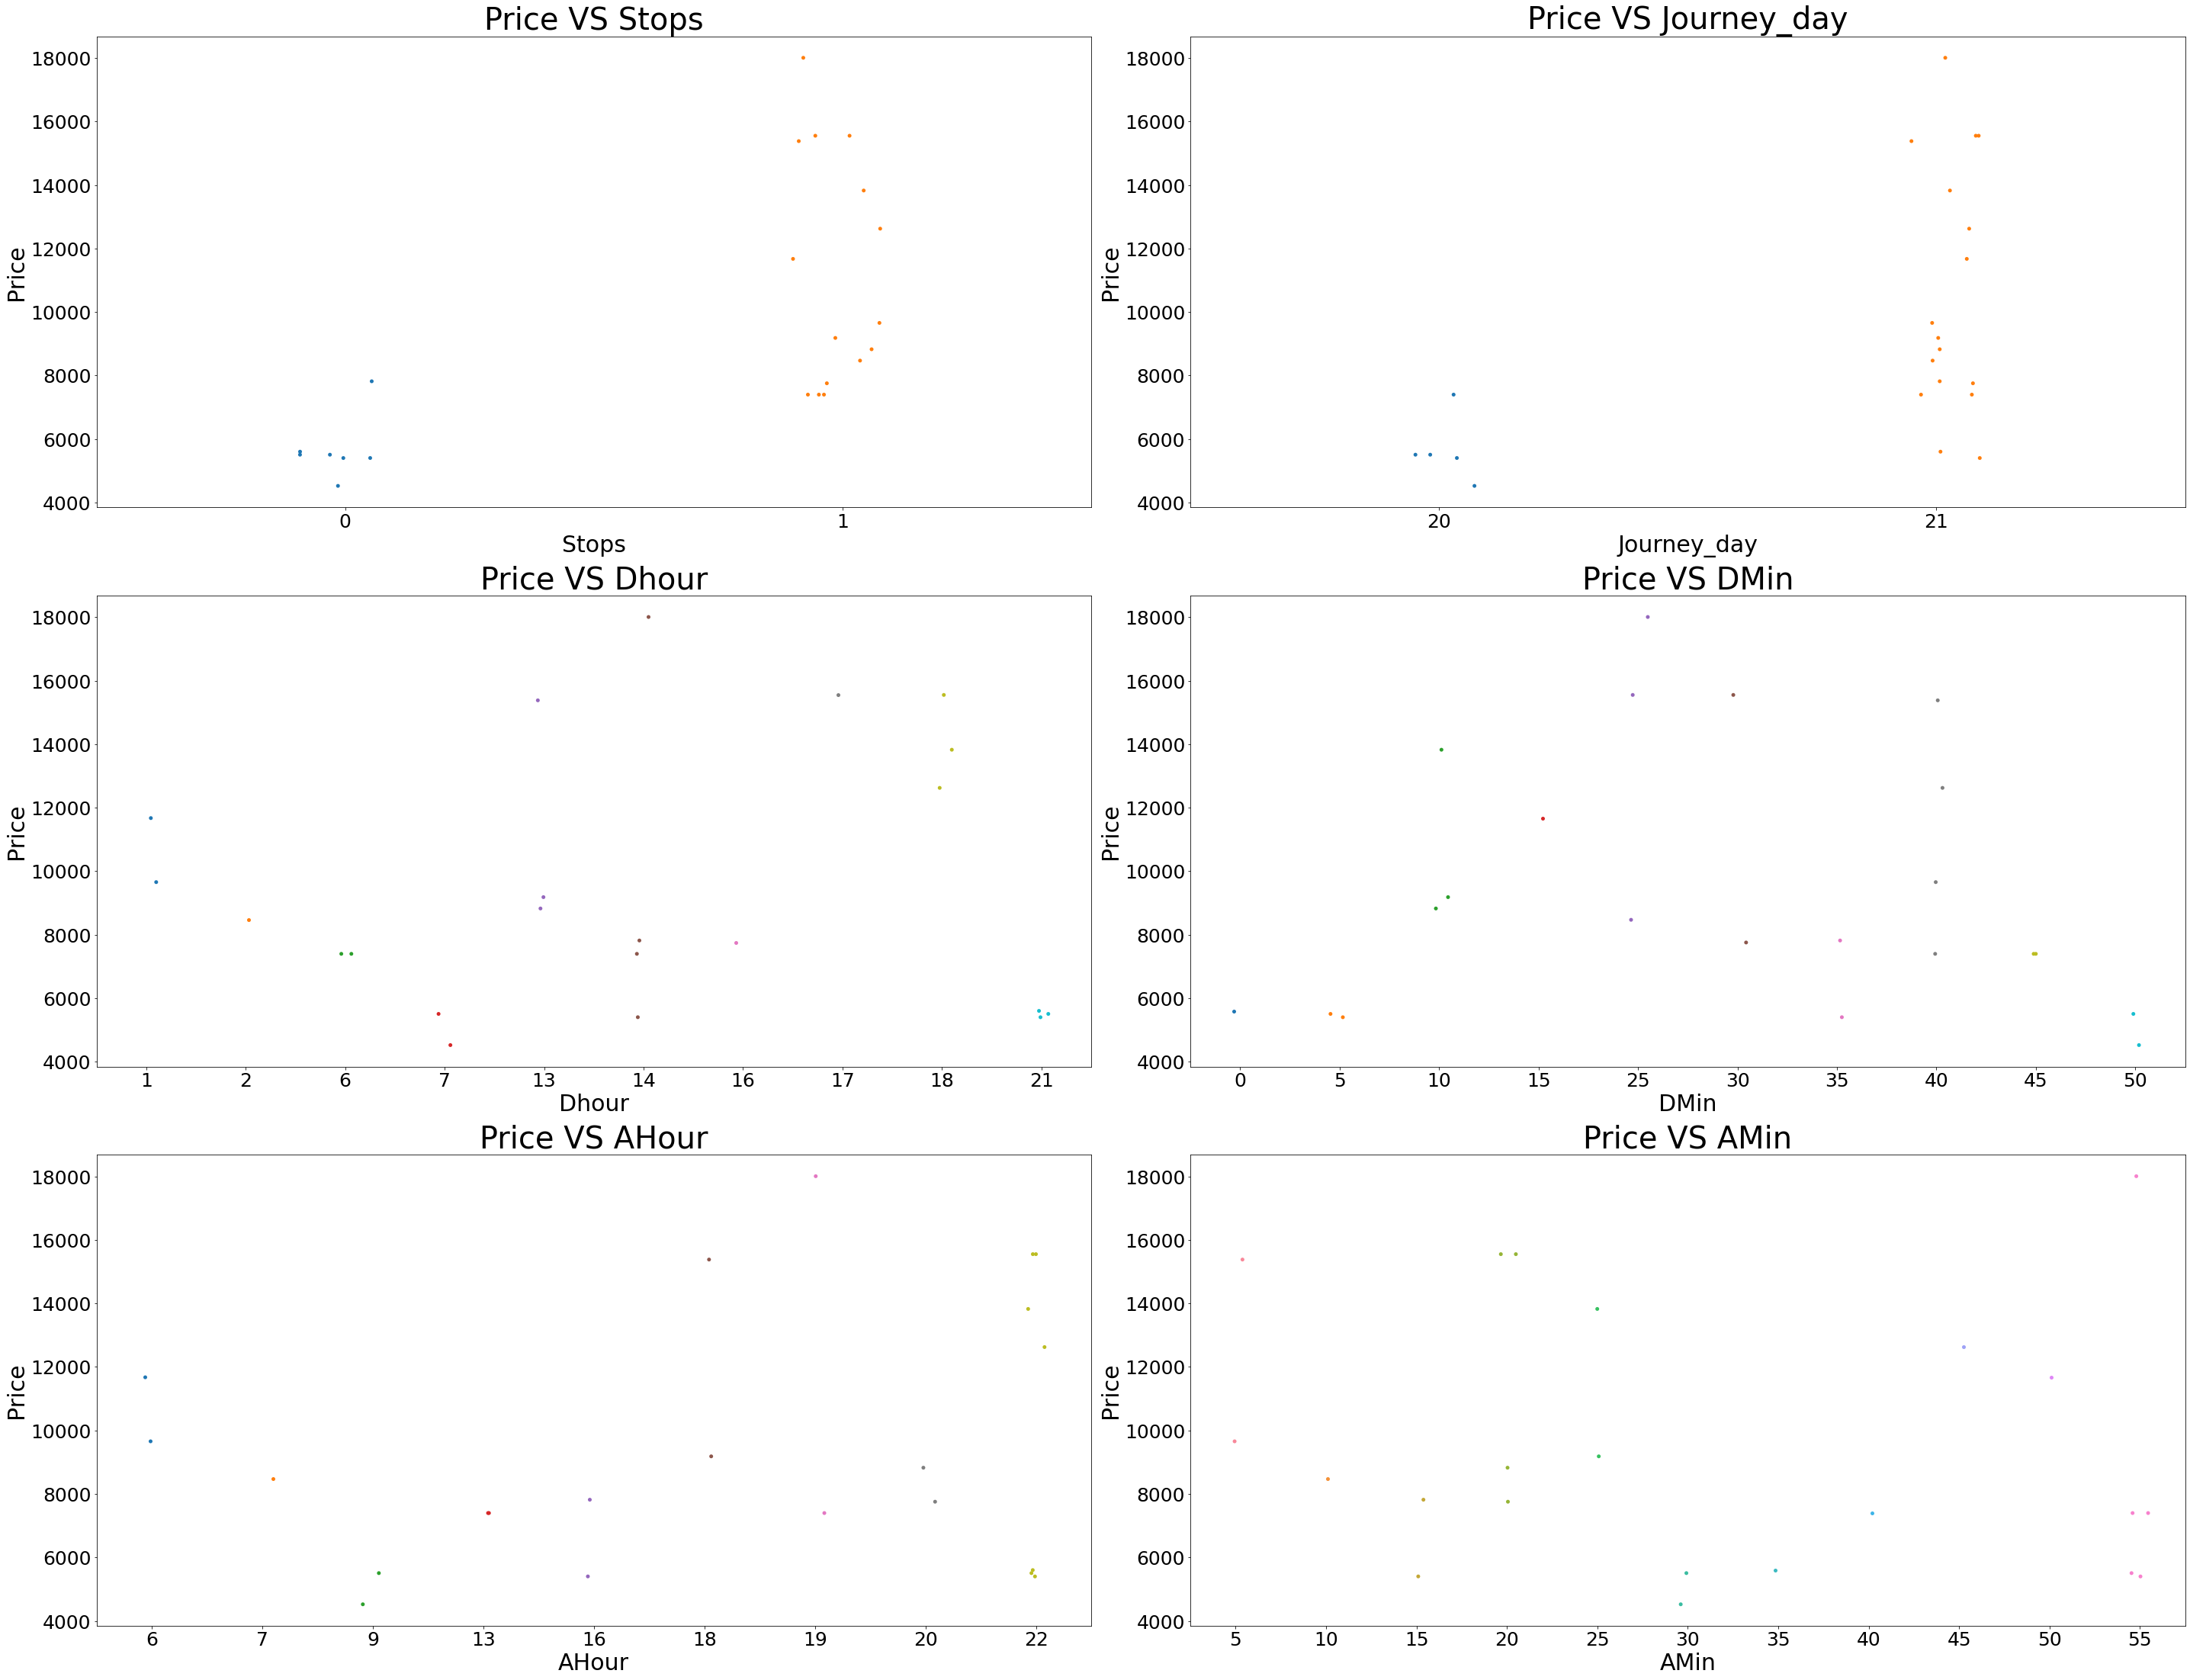

In [47]:
#strip plot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

**Observations:**
- Flights with 1 stop costs more price compared to other flights.
- In all the dates the price is almost same.
- At 2PM departure time of every day the flight Prices are high so it looks good to book flights rather than this departure time.
- And Departure minute has less relation with target Price.
- At 7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights rather than this arrival time.
- And Arrival minute has less relation with target Price.

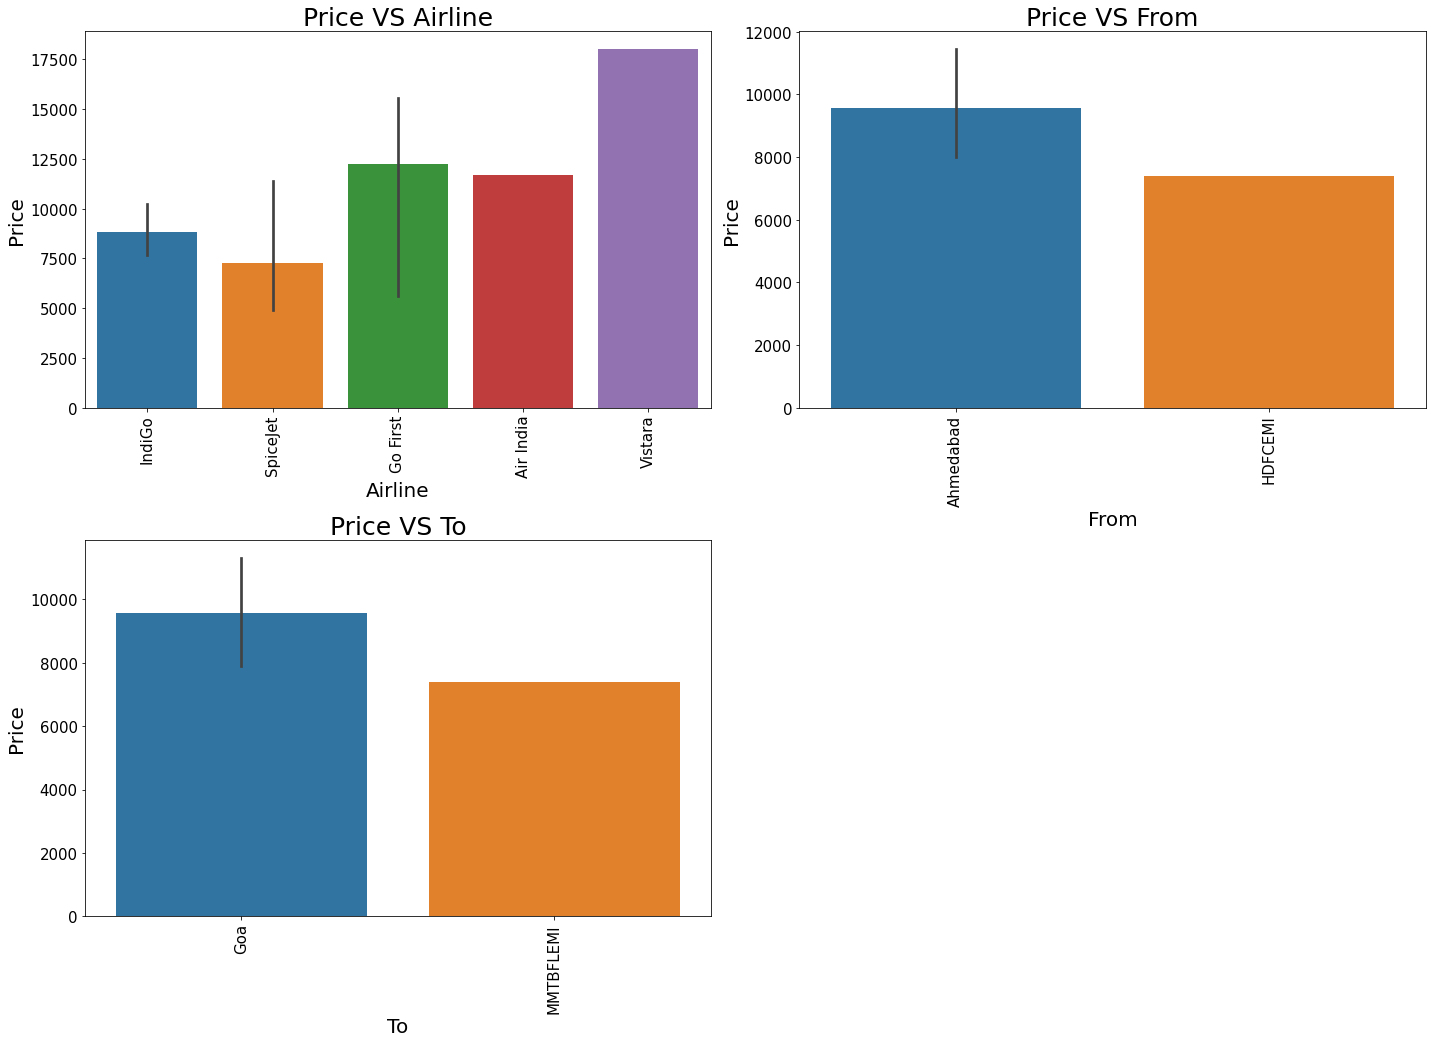

In [48]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(categorical_columns[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

**Observations:**
- For Multiple Airlines the Price is high compared to other Airlines.
- Taking Tirupati as Source costs highest Price Compared to other Source points.
- Taking Tirupati as Destination costs highest Price Compared to other Destination points.

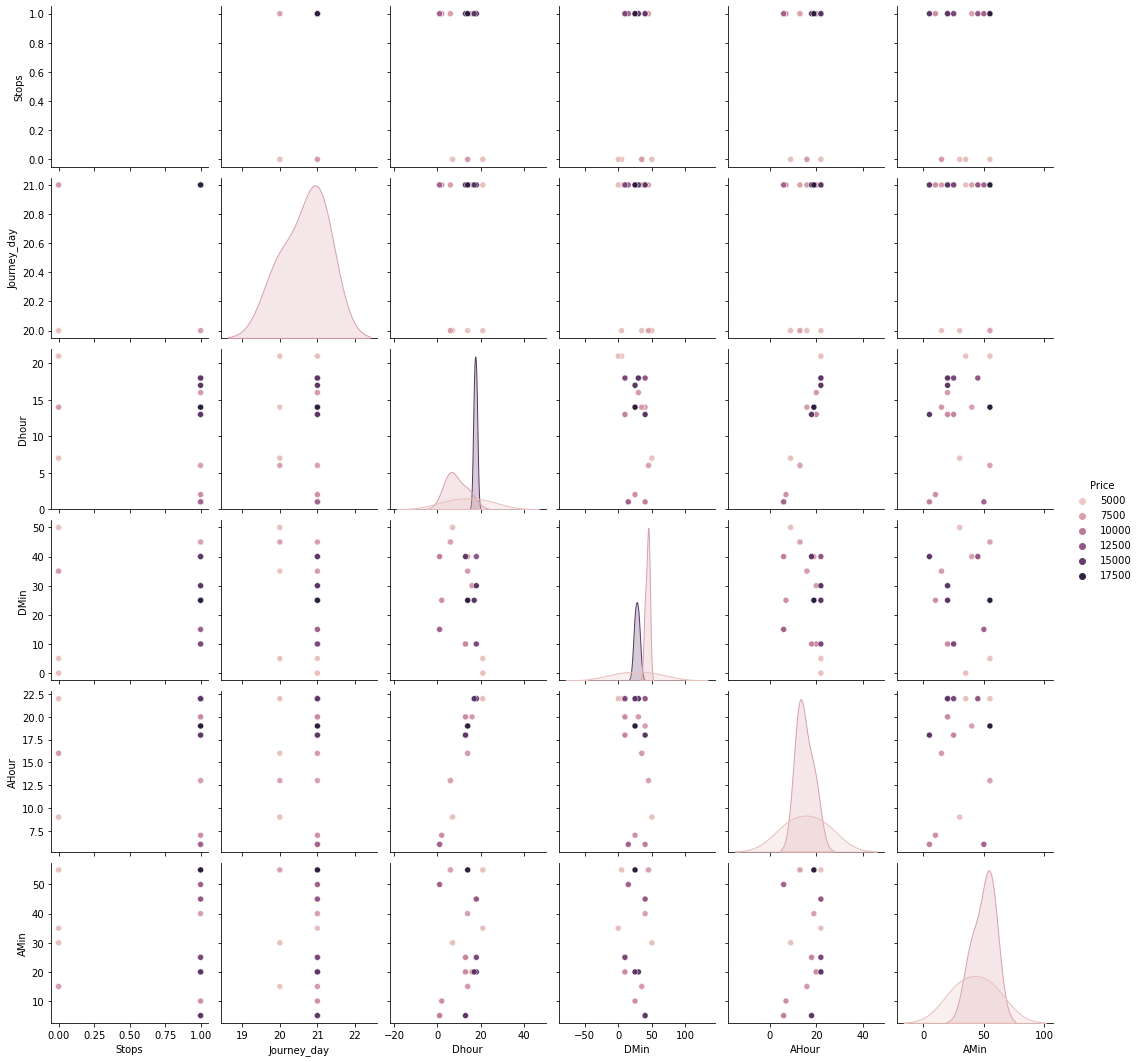

In [49]:
#pair ploting for df
sns.pairplot(df,hue="Price")

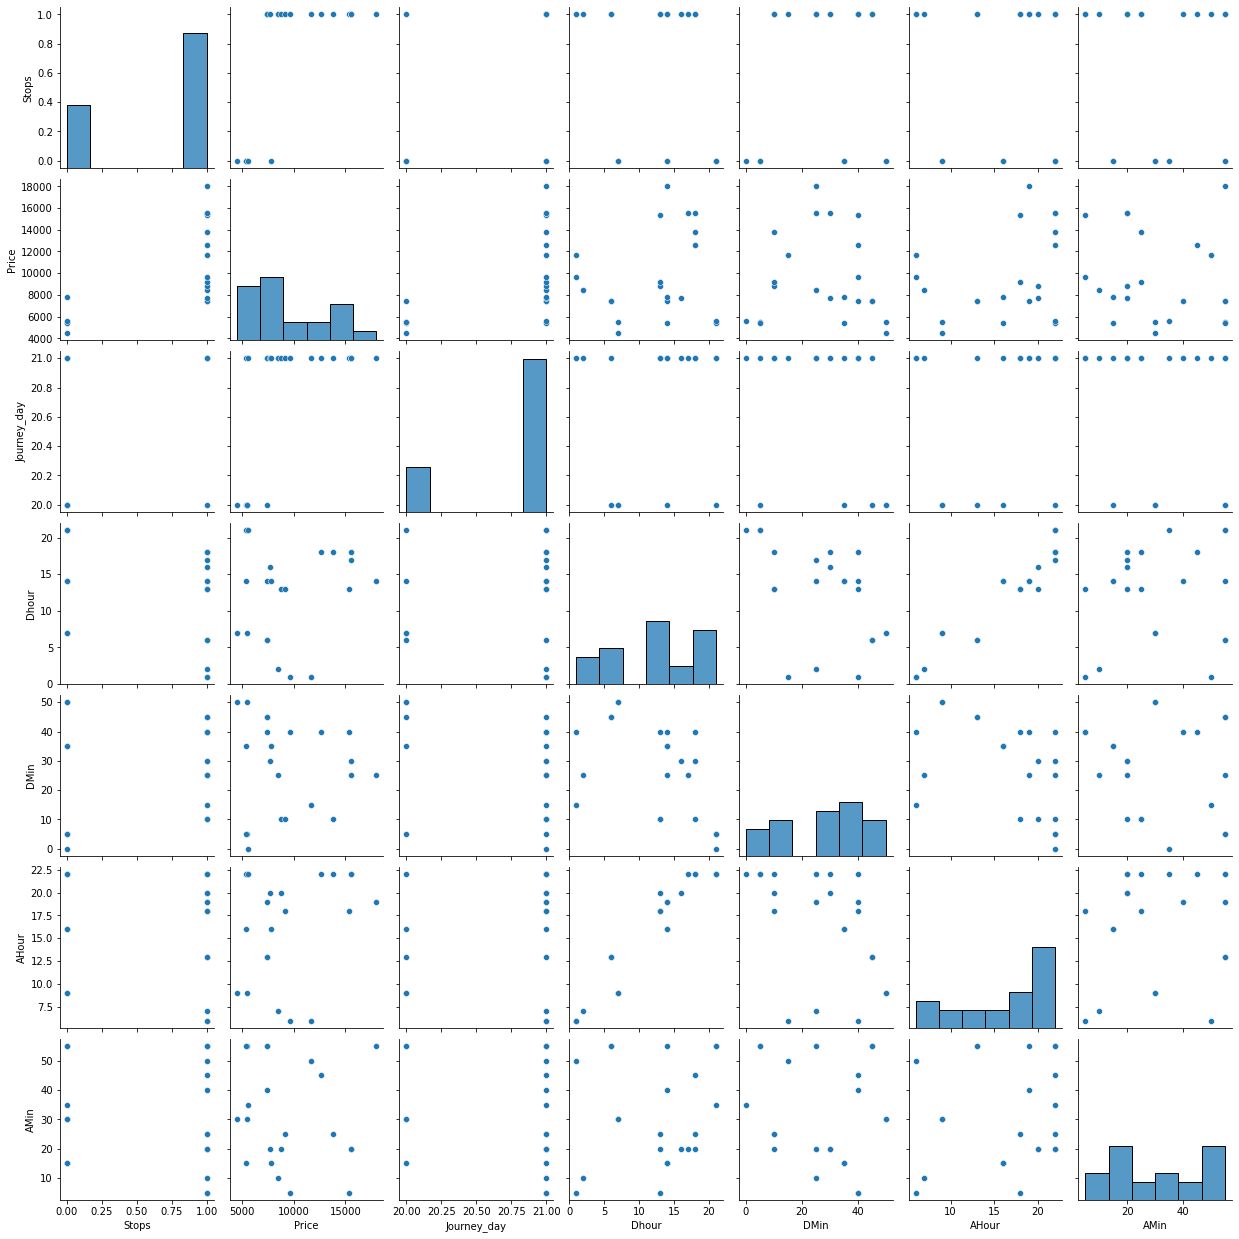

In [50]:
#pair ploting for df
sns.pairplot(df)

Above are the pair plots of each pair of features.

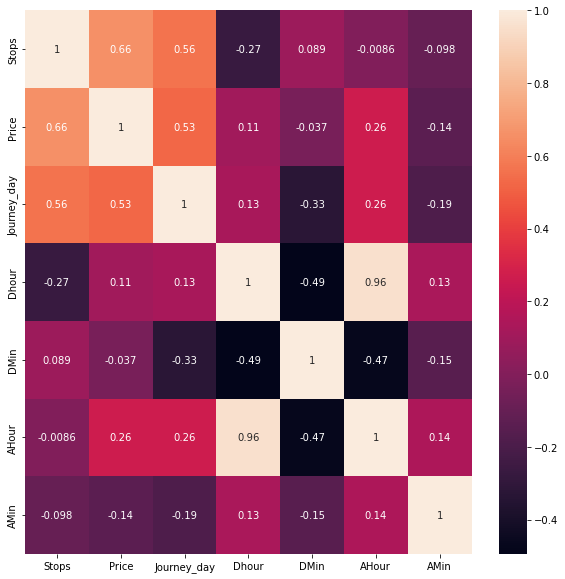

In [51]:
plt.figure(figsize=(10,10))                      # plotting heat map to check correlation
sns.heatmap(df[numerical_columns].corr(method = "pearson"), annot = True)
print("\n") 

In [52]:
df.corr()

,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Stops,1.000000,0.659927,0.561011,-0.271656,0.089133,-0.008641,-0.097555
Price,0.659927,1.000000,0.525642,0.105877,-0.037240,0.261617,-0.138992
Journey_day,0.561011,0.525642,1.000000,0.129398,-0.325960,0.259312,-0.186494
Dhour,-0.271656,0.105877,0.129398,1.000000,-0.494428,0.955831,0.134628
DMin,0.089133,-0.037240,-0.325960,-0.494428,1.000000,-0.472193,-0.150010
AHour,-0.008641,0.261617,0.259312,0.955831,-0.472193,1.000000,0.142803
AMin,-0.097555,-0.138992,-0.186494,0.134628,-0.150010,0.142803,1.000000


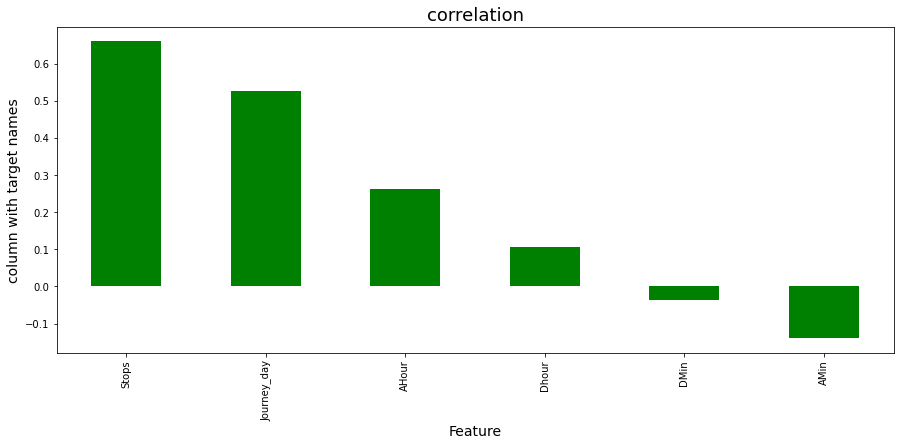

In [53]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Departure hour and Arrival Hour are highly correlated

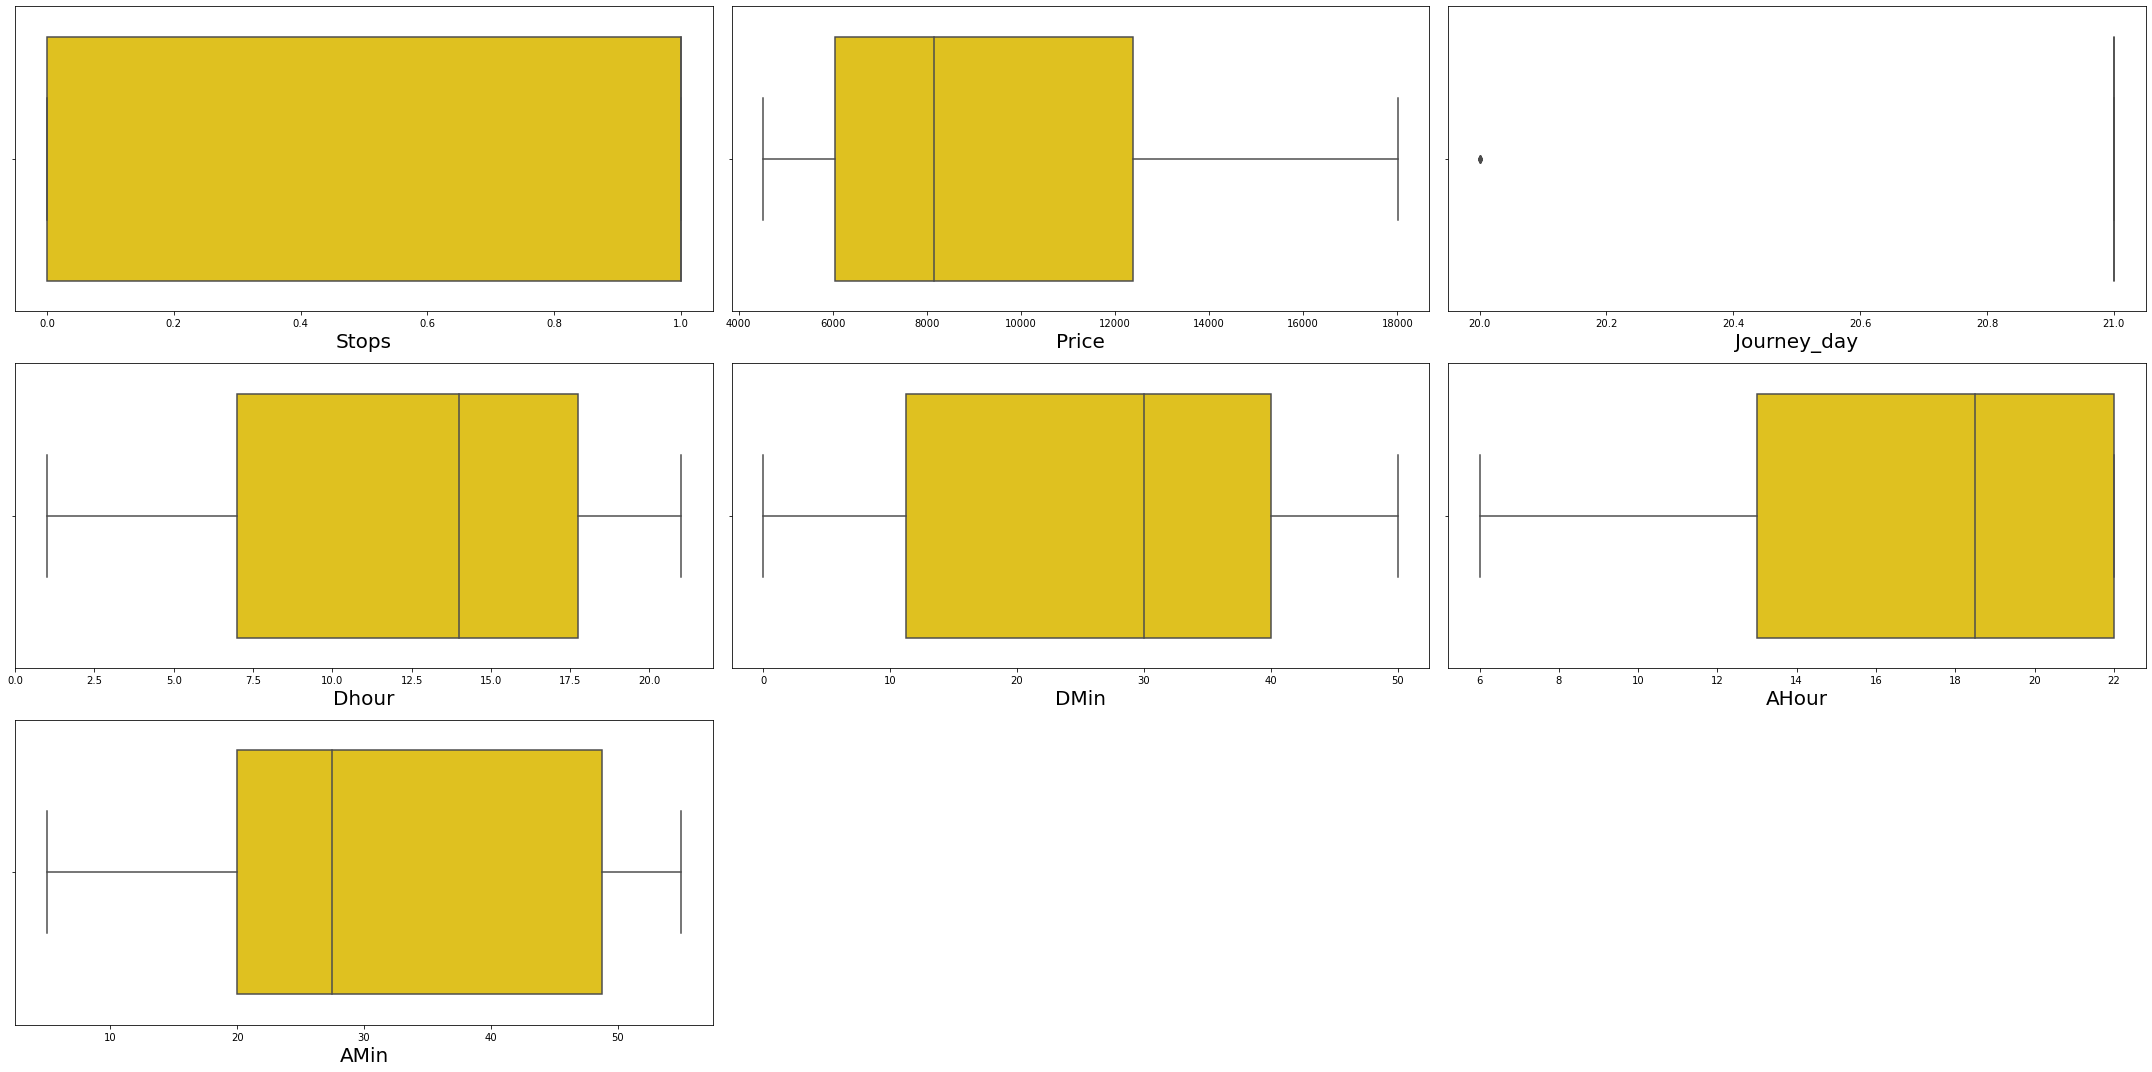

In [54]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in 
- Price

Since Price is my target i should not remove outliers from this column.And Stops is a categorical column So i should not remove outliers here also.

In [55]:
#Checking for skewness
df.skew()

Stops         -0.839047
Price          0.742705
Journey_day   -1.398823
Dhour         -0.509604
DMin          -0.306497
AHour         -0.763458
AMin           0.182641
dtype: float64

There's skewness in Price. Since, Price happens to be my target variable, I will not remove skewness from it.

### Label Encoding

In [56]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To']


Above are the list of categorical columns in df.

In [57]:
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

Using label encoder I have encoded the categorical columns.

By checking correlation Arrival hour and Departure Hour are correlated strongly. Let's drop DHour from our table as it shows negative correlation with the target variable and it shows more correlation with other feature variables as well.

In [58]:
df= df.drop(['Dhour'],axis=1)

In [59]:
# Segregating feature variables and target variable in the dataset

x = df.drop("Price",axis=1)
y = df["Price"]

# Scaling the data using standard scaler:

In [60]:
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

<IPython.core.display.Javascript object>

In [61]:
X.head()

,Airline,From,To,Stops,Journey_day,DMin,AHour,AMin
0,-0.107211,-0.218218,-0.218218,-1.46385,-1.843909,0.471405,-0.088546,-0.946330
1,1.072113,-0.218218,-0.218218,-1.46385,-1.843909,1.443676,-1.328186,-0.066643
2,1.072113,-0.218218,-0.218218,-1.46385,-1.843909,1.443676,-1.328186,-0.066643
3,1.072113,-0.218218,-0.218218,-1.46385,-1.843909,-1.473139,0.974003,1.399502
4,-0.107211,4.582576,-0.218218,0.68313,-1.843909,1.119586,-0.619820,1.399502


In [62]:
# Checking for multicolinearity issue using VIF:

vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

<IPython.core.display.Javascript object>

,vif_Features,Features
0,1.310989,Airline
1,1.827503,From
2,1.173829,To
3,2.198726,Stops
4,2.894057,Journey_day
5,1.852490,DMin
6,1.456790,AHour
7,1.317359,AMin


There is no multicolinearity issue in this dataset.

In [63]:
# Finding Best Random State and Accuracy:

maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7479517975586389  on Random_state  162


I got the best accuracy and random state.

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

## Model Building

### Random Forest Regressor

In [65]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 69.08237391609977
mean_squared_error: 3540835.2465999993
mean_absolute_error: 1600.6142857142856


<IPython.core.display.Javascript object>

root_mean_squared_error: 1881.7107234110133


### XGB Regressor

In [66]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 71.61305472806188
mean_squared_error: 3251009.5079558576
mean_absolute_error: 1343.9325474330358


<IPython.core.display.Javascript object>

root_mean_squared_error: 1803.0556031237245


### Extra Tree Regressor

In [67]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8451596861673148
mean_squared_error: 1773305.7490428572
mean_absolute_error: 962.45


<IPython.core.display.Javascript object>

root_mean_squared_error: 1331.6552665922427


### Gradient Boosting

In [68]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8014490086956492
mean_squared_error: 2273901.451392182
mean_absolute_error: 1122.676171247595


<IPython.core.display.Javascript object>

root_mean_squared_error: 1507.9461036098678


### Decision Tree Regressor

In [69]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6009202340771478
mean_squared_error: 4570453.428571428
mean_absolute_error: 1499.7142857142858


<IPython.core.display.Javascript object>

root_mean_squared_error: 2137.8618824824553


### K-NN Regressor

In [70]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.1079661423616527
mean_squared_error: 12688961.17142857
mean_absolute_error: 3464.8285714285716


<IPython.core.display.Javascript object>

root_mean_squared_error: 3562.1568145476936


### Bagging Regressor

In [71]:
BG=BaggingRegressor()
BG.fit(X_train,y_train)
pred=BG.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.40651111960825514
mean_squared_error: 6796920.114285714
mean_absolute_error: 2163.4285714285716


<IPython.core.display.Javascript object>

root_mean_squared_error: 2607.090354070168


### Hyper Parameter Tuning

In [72]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [73]:
# Giving Extra Tree Regressor parameter
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [74]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

In [75]:
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 20,
 'n_jobs': -2}

Got the best parameters for ETR.

In [82]:
Best_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=1,min_samples_split=3,n_estimators=20,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 81.0773991918903
mean_squared_error: 2167107.2583928565
mean_absolute_error: 1106.1714285714284


<IPython.core.display.Javascript object>

RMSE value: 1472.1097983482266


In [83]:
## Saving the Model

# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

In [84]:
# Predicting Flight Price for test dataset using Saved model of trained dataset:

In [85]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([15550.   ,  9014.425,  4526.   ,  4873.45 ,  4873.45 ,  7515.025,
       13583.65 ])

In [86]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6
Predicted,15550.0,9014.425,4526.0,4873.45,4873.45,7515.025,13583.65
Actual,15550.0,7756.000,5508.0,7819.00,5404.00,7399.000,11673.00


Above are the predicted values and the actual values.They are almost similar.

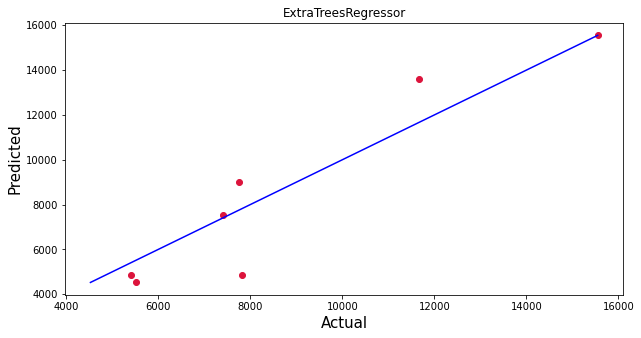

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.